In [14]:
#Importar bibliotecas
import json
from urllib.request import urlopen
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from highlight_text import fig_text
import pandas as pd
from mplsoccer import Bumpy, FontManager, add_image

In [15]:
#Importar fontes da web
font_normal = FontManager("https://github.com/google/fonts/raw/main/ofl/roboto/Roboto%5Bwdth,wght%5D.ttf")
font_bold = FontManager("https://github.com/google/fonts/raw/main/ofl/roboto/Roboto-Italic%5Bwdth,wght%5D.ttf")

In [16]:
#Carregar os dados
br_23 = pd.read_json('D:/pythonProject/Tutoriais/data/processed/transfermkt_38r_br23.json')

In [17]:
#Filtrar pelas colunas necessárias
clubes_posicoes_df = br_23[["Clube", "Posicao", "Rodada"]]

In [18]:
# Criação de uma tabela pivotada a partir do DataFrame 'clubes_posicoes_df'
# Indexada pelos clubes, com as colunas representando as rodadas e os valores sendo as posições.
df_pivot = pd.pivot_table(clubes_posicoes_df, index='Clube', columns='Rodada', values='Posicao')

# Preenche valores nulos (NaN) na tabela pivotada com strings vazias.
df_pivot = df_pivot.fillna('')

# Define o nome do índice da tabela pivotada como 'Clube'.
df_pivot.index.name = 'Clube'

# Renomeia as colunas da tabela pivotada para incluir o prefixo 'Rodada' seguido do número da rodada.
df_pivot.columns = [f'Rodada {col}' for col in df_pivot.columns]

# Imprime a tabela pivotada resultante.
print(df_pivot)

               Rodada 1  Rodada 2  Rodada 3  Rodada 4  Rodada 5  Rodada 6  \
Clube                                                                       
América_MG         19.0      19.0      20.0      20.0      20.0      20.0   
Athletico_PR        3.0      11.0      14.0      10.0       5.0       5.0   
Atlético_MG        12.0      16.0      10.0      16.0       8.0       7.0   
Bahia              13.0      18.0      15.0       9.0      15.0      15.0   
Botafogo            4.0       2.0       1.0       1.0       1.0       1.0   
Bragantino          7.0       7.0      12.0      12.0      14.0      12.0   
Corinthians         5.0      14.0      17.0      15.0      16.0      17.0   
Coritiba           20.0      20.0      19.0      19.0      19.0      19.0   
Cruzeiro           14.0      12.0       6.0       3.0       6.0       4.0   
Cuiabá             15.0      15.0      18.0      13.0      17.0      18.0   
Flamengo            1.0       8.0      13.0      17.0      12.0      10.0   

In [19]:
# Substitui valores não numéricos por NaN
df_pivot = df_pivot.apply(pd.to_numeric, errors='coerce').fillna(0)

# Converte para inteiros
df_pivot = df_pivot.astype(int)

df_pivot = df_pivot.T

# Exibe o DataFrame
print(df_pivot)

Clube      América_MG  Athletico_PR  Atlético_MG  Bahia  Botafogo  Bragantino  \
Rodada 1           19             3           12     13         4           7   
Rodada 2           19            11           16     18         2           7   
Rodada 3           20            14           10     15         1          12   
Rodada 4           20            10           16      9         1          12   
Rodada 5           20             5            8     15         1          14   
Rodada 6           20             5            7     15         1          12   
Rodada 7           19             8            4     13         1          12   
Rodada 8           19            11            4     16         1          10   
Rodada 9           18             8            3     15         1          11   
Rodada 10          18             7            4     15         1          11   
Rodada 11          18            11            5     14         1           8   
Rodada 12          19       

In [20]:
#Analisando Red Bull Bragantino
df_pivot['Bragantino']

Rodada 1      7
Rodada 2      7
Rodada 3     12
Rodada 4     12
Rodada 5     14
Rodada 6     12
Rodada 7     12
Rodada 8     10
Rodada 9     11
Rodada 10    11
Rodada 11     8
Rodada 12     6
Rodada 13     5
Rodada 14     5
Rodada 15     7
Rodada 16     7
Rodada 17     5
Rodada 18     3
Rodada 19     4
Rodada 20     7
Rodada 21     6
Rodada 22     6
Rodada 23     4
Rodada 24     4
Rodada 25     2
Rodada 26     2
Rodada 27     2
Rodada 28     2
Rodada 29     2
Rodada 30     4
Rodada 31     3
Rodada 32     3
Rodada 33     5
Rodada 34     4
Rodada 35     5
Rodada 36     6
Rodada 37     6
Rodada 38     6
Name: Bragantino, dtype: int32

In [21]:
# Rodadas
rodada = 38
match_day = [f"Rodada {num}" for num in range(1, rodada + 1)]

In [22]:
#Cria as variaveis com os logos dos times online
Botafogo        = Image.open(
    urlopen('https://images.fotmob.com/image_resources/logo/teamlogo/8517_xsmall.png'))

Palmeiras       = Image.open(
    urlopen('https://images.fotmob.com/image_resources/logo/teamlogo/10283_xsmall.png'))

Bragantino   = Image.open(
    urlopen('https://images.fotmob.com/image_resources/logo/teamlogo/109705_xsmall.png'))

Grêmio          = Image.open(
    urlopen('https://images.fotmob.com/image_resources/logo/teamlogo/9769_xsmall.png'))

Atlético_MG     = Image.open(
    urlopen('https://images.fotmob.com/image_resources/logo/teamlogo/10272_xsmall.png'))

Flamengo        = Image.open(
    urlopen('https://images.fotmob.com/image_resources/logo/teamlogo/9770_xsmall.png'))

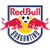

In [26]:
Bragantino

In [23]:
# Instanciação do objeto Bumpy, utilizado para criar gráficos "bump charts".
# Definição de parâmetros estéticos para o gráfico.
bumpy = Bumpy(
    scatter_color="#282A2C", line_color="#252525",  # Cores do scatter plot e das linhas
    rotate_xticks=90,  # Rotação dos rótulos no eixo x em 90 graus
    ticklabel_size=17, label_size=30,  # Tamanho das fontes dos rótulos e das etiquetas
    scatter_primary='D',  # Marcador a ser usado no scatter plot
    show_right=True,  # Exibir as posições no lado direito do gráfico
    plot_labels=True,  # Incluir as etiquetas no gráfico
    alignment_yvalue=0.1,  # Alinhamento vertical das etiquetas
    alignment_xvalue=0.065  # Alinhamento horizontal das etiquetas
)


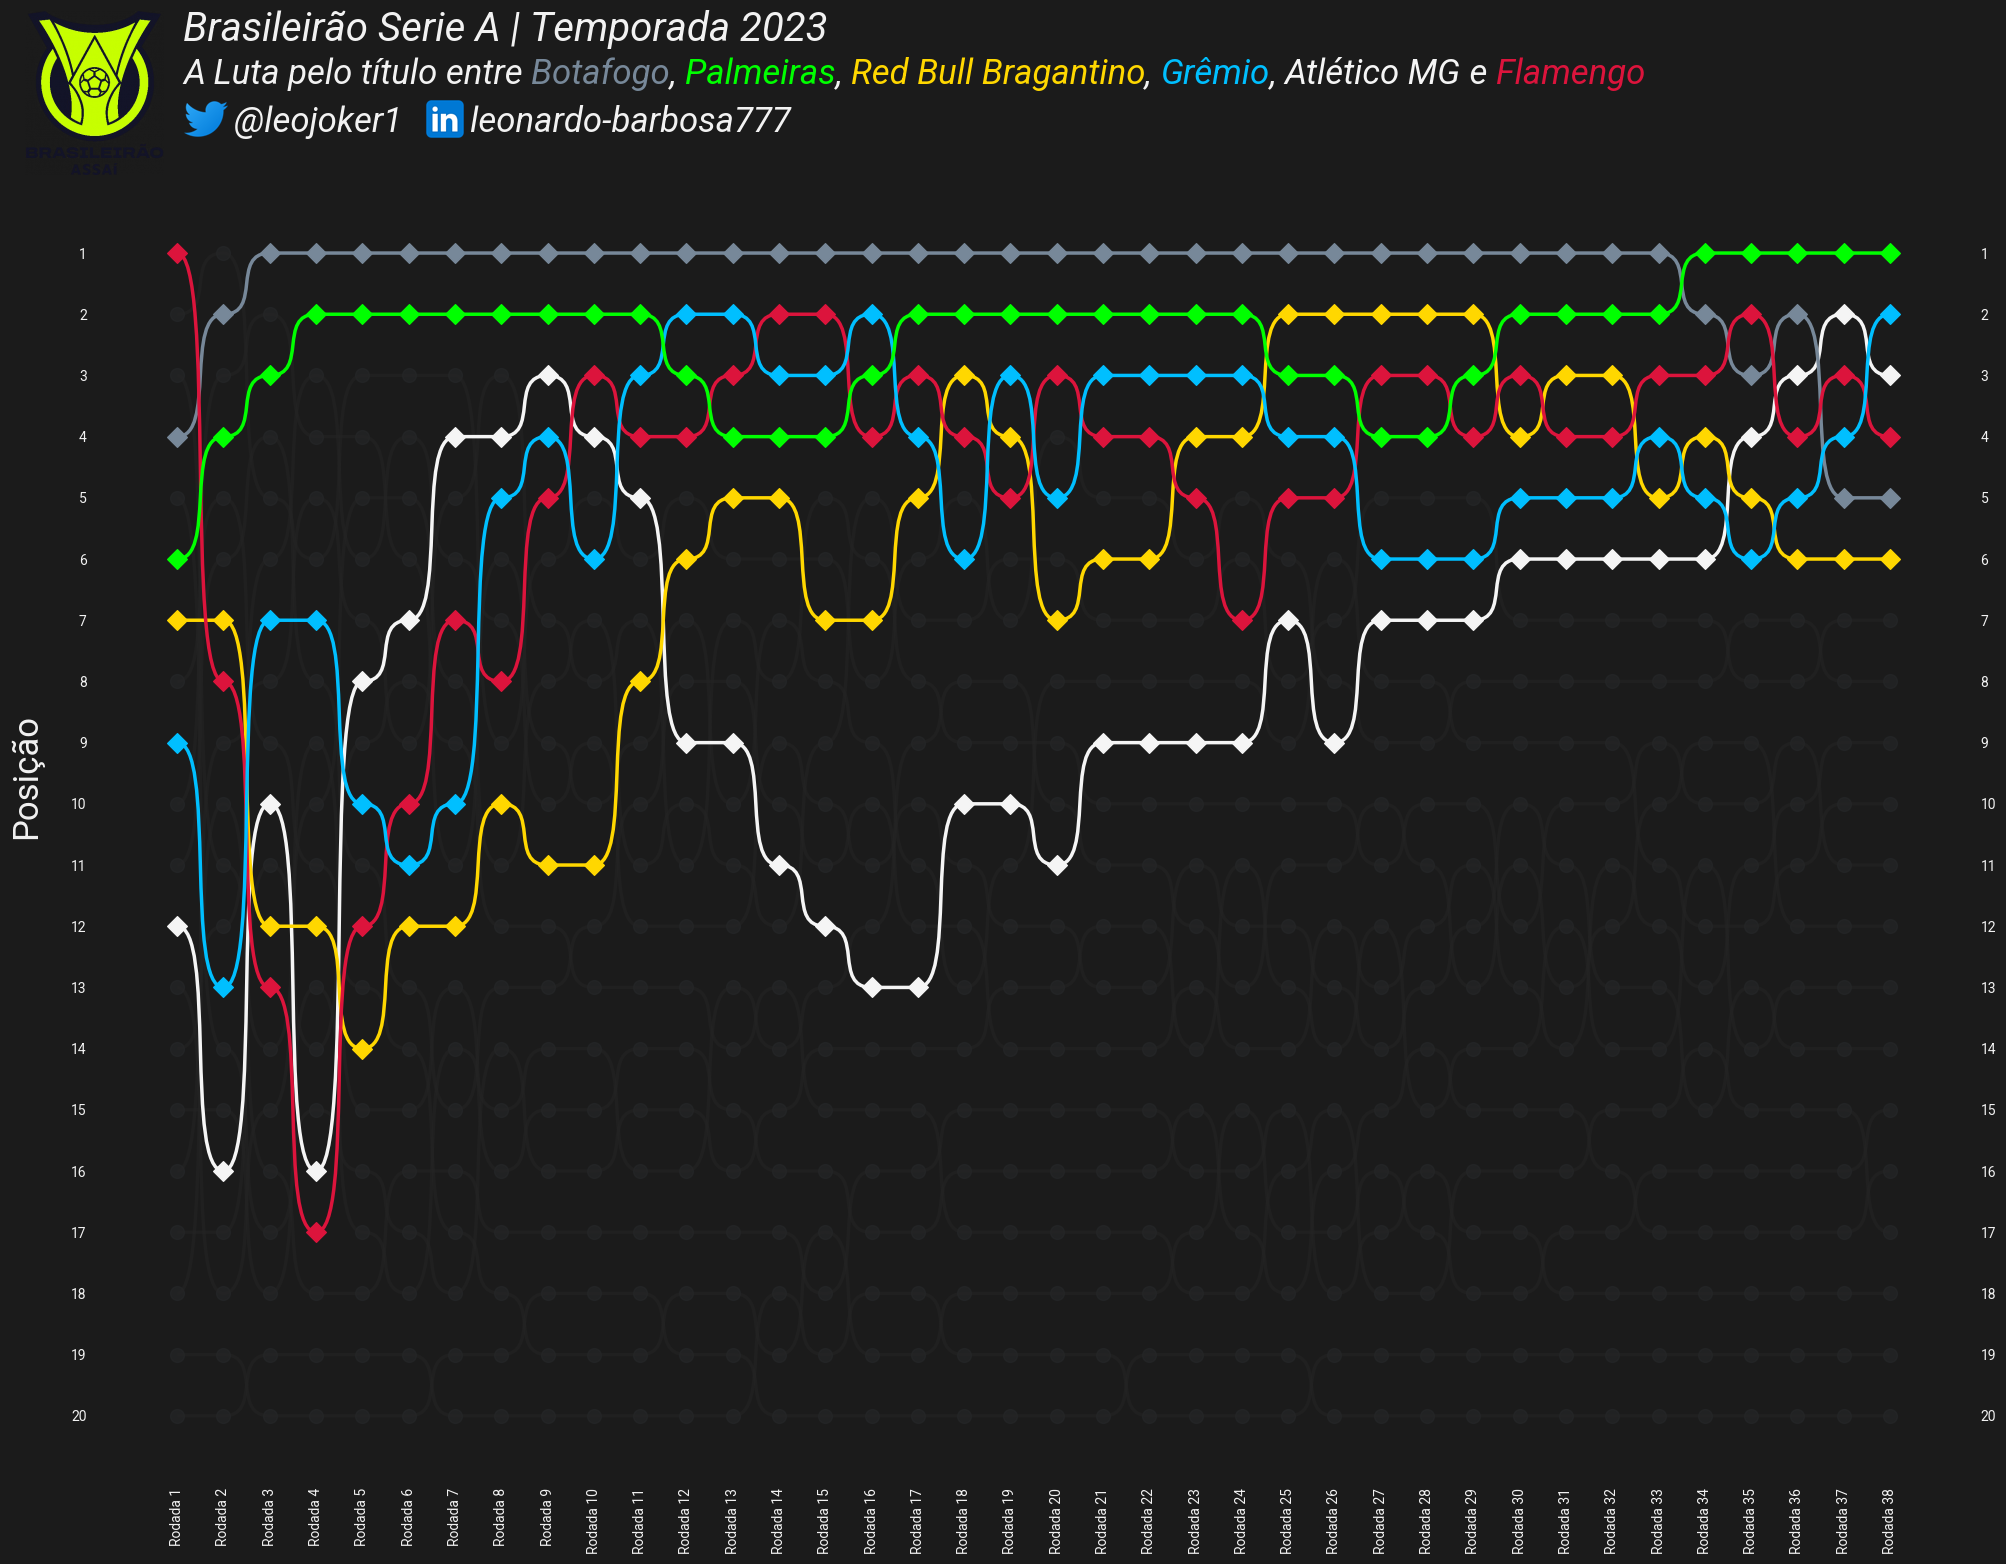

In [24]:
# Abre uma imagem representando o logo do Campeonato Brasileiro Serie A
br23 = Image.open(
    urlopen("https://tmssl.akamaized.net/images/logo/header/bra1.png")
)

# Dicionário para destacar equipes específicas no gráfico e suas cores correspondentes
highlight_dict = {
    "Botafogo": "#778899",
    "Palmeiras": "#00FF00",
    "Bragantino": "#FFD700",
    "Grêmio": "#00BFFF",
    "Atlético_MG" : "#F5F5F5",
    "Flamengo" : "#DC143C"      
}

# Importa bibliotecas para adicionar imagens ao gráfico
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image
from urllib.request import urlopen

# Cria um novo gráfico bumpychart
fig, ax = bumpy.plot(
    x_list=match_day,
    y_list=np.linspace(1, 20, 20).astype(int),
    values=df_pivot,
    secondary_alpha=0.5,
    highlight_dict=highlight_dict,
    figsize=(20, 16),
    x_label='', y_label='',
    ylim=(-0.1, 23),
    lw=2.5,
    fontproperties=font_normal.prop,
)

# Define as posições das palavras "Posição" e "Rodada"
ax.set_ylabel('Posição', labelpad=20, fontsize=25, color="#F2F2F2")

# Título e subtítulo do gráfico
TITLE = "Brasileirão Serie A | Temporada 2023"
SUB_TITLE = "A Luta pelo título entre <Botafogo>, <Palmeiras>, <Red Bull Bragantino>, <Grêmio>, <Atlético MG> e <Flamengo>"
ASS = "      @leojoker1        leonardo-barbosa777"

# Adiciona o título
fig.text(0.09, 0.95, TITLE, size=29, color="#F2F2F2", fontproperties=font_bold.prop)

# Adiciona o subtítulo
fig_text(
    0.09, 0.94, SUB_TITLE, color="#F2F2F2",
    highlight_textprops=[{"color": '#778899'}, {"color": '#00FF00'}, {"color": '#FFD700'}, 
                        {"color": '#00BFFF'}, {"color": '#F5F5F5'}, {"color": '#DC143C'}],
    size=25, fig=fig, fontproperties=font_bold.prop
)

# Adiciona assinatura
fig_text(
    0.09, 0.91, ASS, color="#F2F2F2", size=25, fontproperties=font_bold.prop
)

# Adiciona a imagem do campeonato no canto superior esquerdo
fig.figimage(br23, xo=25, yo=1380, origin='upper', zorder=10)  # Ajuste as coordenadas conforme necessário

# Adiciona o ícone do Twitter no canto superior direito
twitter_icon_path = "D:/pythonProject/Tutoriais/images/x.png"  # Substitua pelo caminho correto
twitter_icon = Image.open(twitter_icon_path)
n_size = (50,50)
twitter_icon = twitter_icon.resize(n_size)
fig.figimage(twitter_icon, xo=180, yo=1420, origin='upper')

# Adiciona o ícone do LinkedIn no canto superior direito
linkedin_icon_path = "D:/pythonProject/Tutoriais/images/linkedin.png"  # Substitua pelo caminho correto
linkedin_icon = Image.open(linkedin_icon_path)
n_size = (50,50)
linkedin_icon = linkedin_icon.resize(n_size)
fig.figimage(linkedin_icon, xo=420, yo=1420, origin='upper')

# Se houver espaço adicional no gráfico
plt.tight_layout(pad=0.5)

# Salva a imagem gerada
fig.savefig(f'D:/pythonProject/Tutoriais/images/bumpychart_titulo_rodada_{rodada}_br23.png', dpi=300, bbox_inches='tight')

# Exibe o gráfico
plt.show()


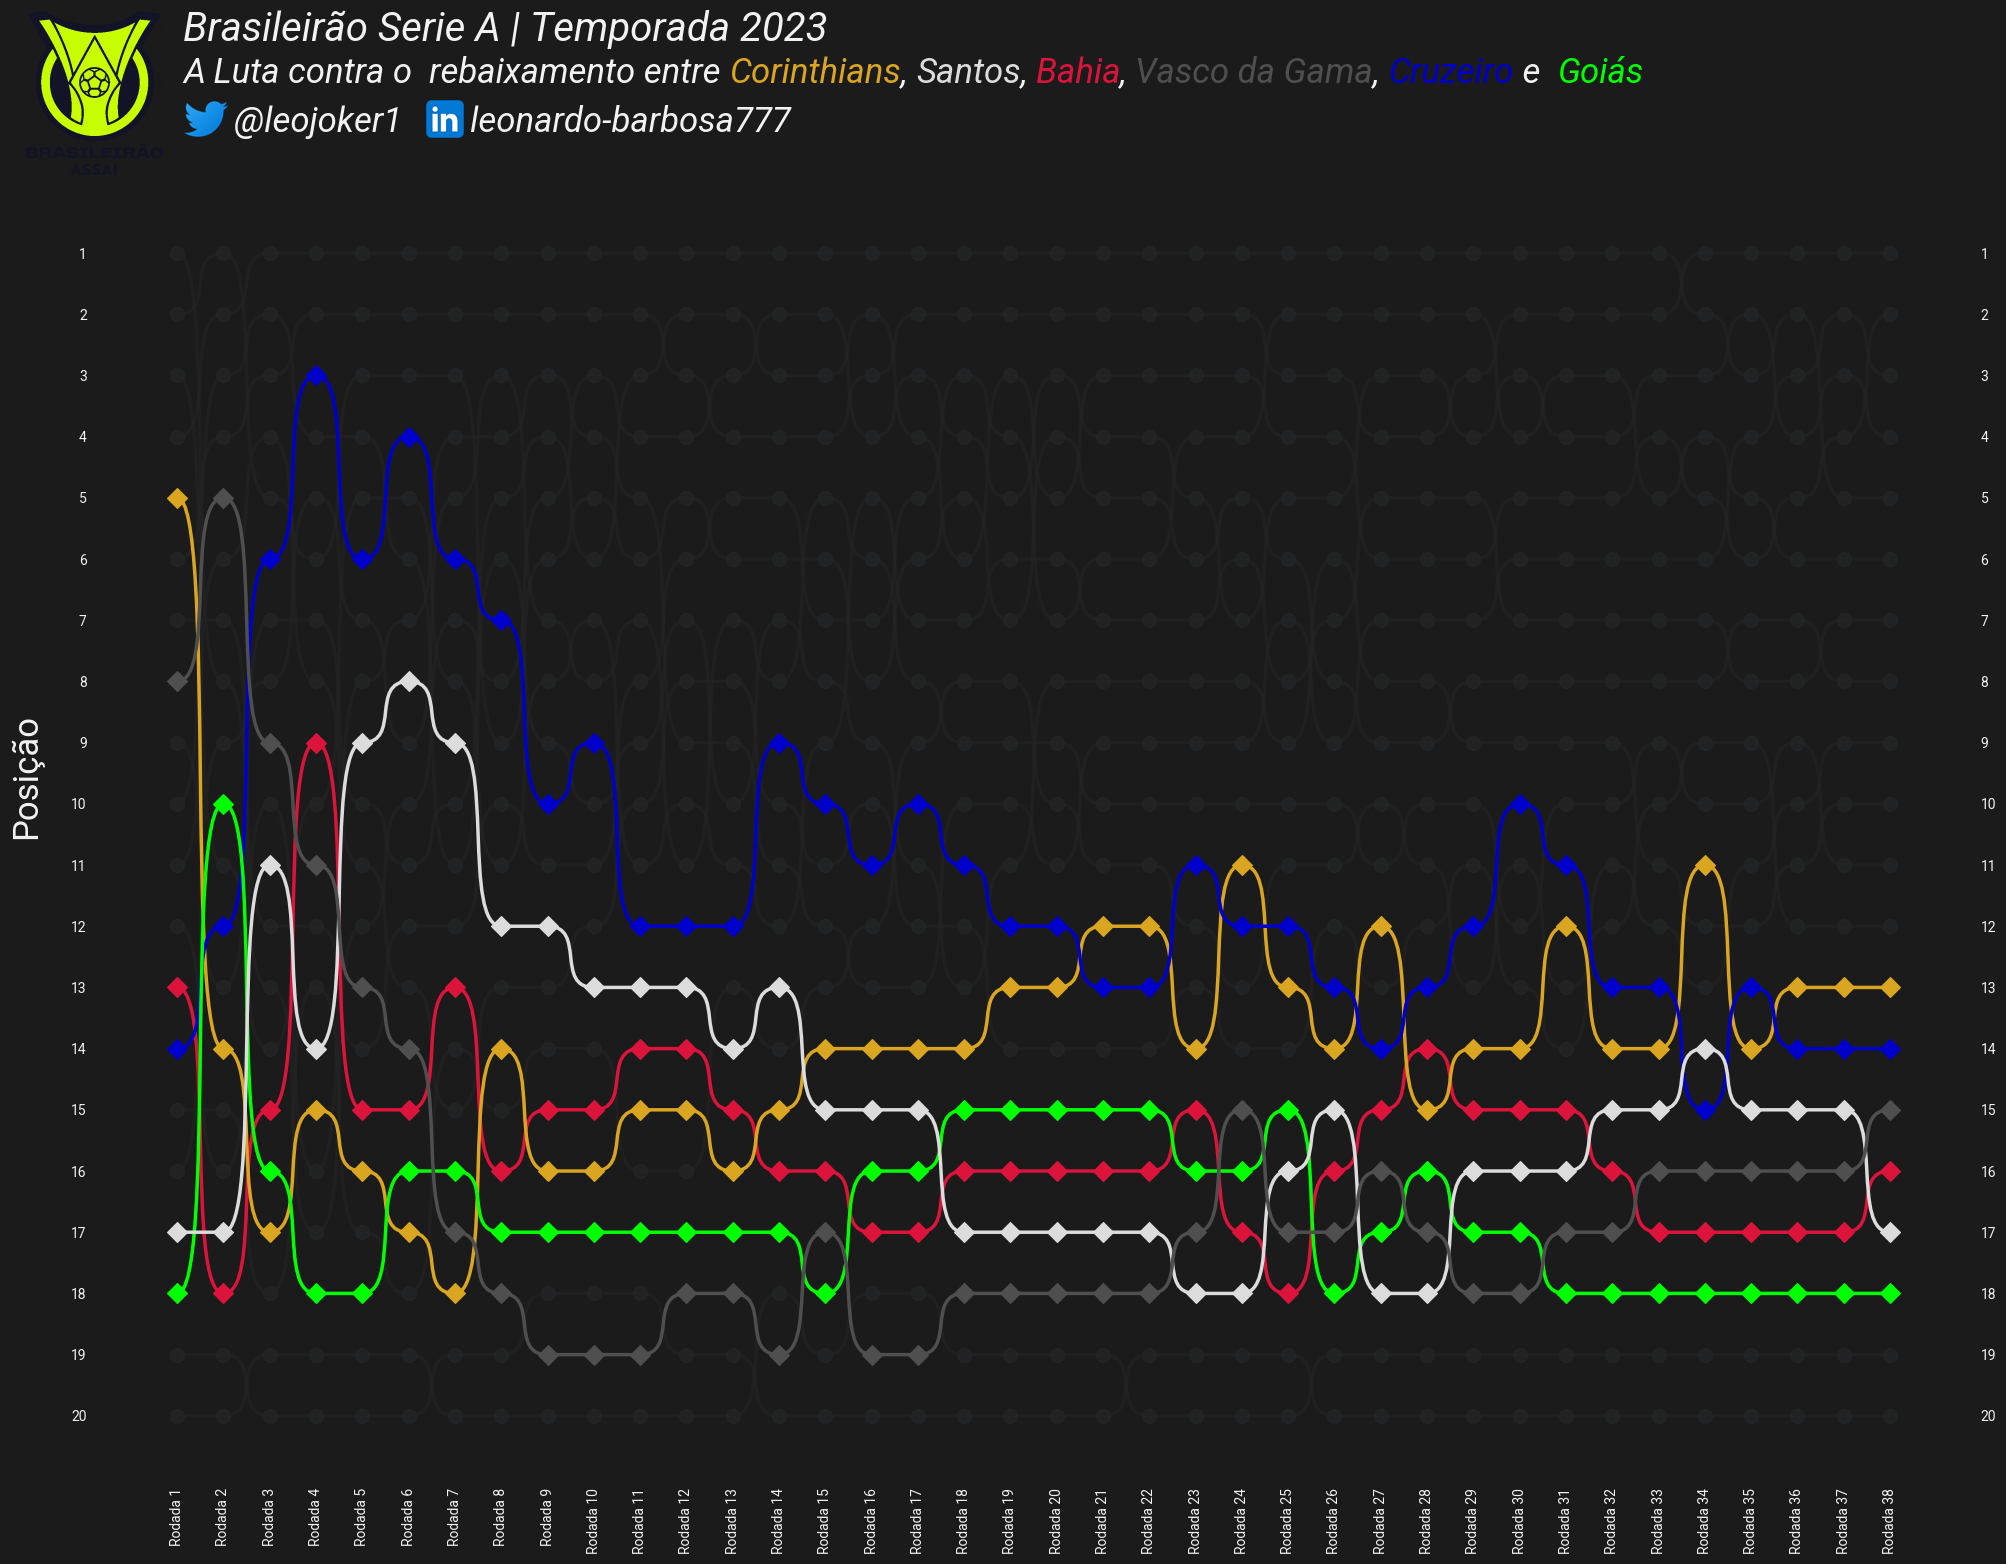

In [25]:
# Abre uma imagem representando o logo do Campeonato Brasileiro Serie A
br23 = Image.open(
    urlopen("https://tmssl.akamaized.net/images/logo/header/bra1.png")
)

# Dicionário para destacar equipes específicas no gráfico e suas cores correspondentes
highlight_dict = {
    "Corinthians": "#DAA520",
    "Santos": "#DCDCDC",
    "Bahia": "#DC143C",
    "Vasco da Gama": "#4F4F4F",
    "Cruzeiro" : "#0000CD",
    "Goiás" : "#00FF00"
}

from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image
from urllib.request import urlopen


# Crie um novo gráfico
fig, ax = bumpy.plot(
    x_list=match_day,
    y_list=np.linspace(1, 20, 20).astype(int),
    values=df_pivot,
    secondary_alpha=0.5,
    highlight_dict=highlight_dict,
    figsize=(20, 16),
    x_label='', y_label='',
    ylim=(-0.1, 23),
    lw=2.5,
    fontproperties=font_normal.prop,
)

# Defina as posições das palavras "Posição" e "Rodada"
#ax.set_xlabel('Rodada', labelpad=20, fontsize=25, color="#F2F2F2")
ax.set_ylabel('Posição', labelpad=20, fontsize=25, color="#F2F2F2")

# title and subtitle
TITLE = "Brasileirão Serie A | Temporada 2023"
SUB_TITLE = "A Luta contra o  rebaixamento entre <Corinthians>, <Santos>, <Bahia>, <Vasco da Gama>, <Cruzeiro> e  <Goiás>"
ASS = "      @leojoker1        leonardo-barbosa777"

# add title
fig.text(0.09, 0.95, TITLE, size=29, color="#F2F2F2", fontproperties=font_bold.prop)

# add subtitle
fig_text(
    0.09, 0.94, SUB_TITLE, color="#F2F2F2",
    highlight_textprops=[{"color": '#DAA520'}, {"color": '#DCDCDC'}, {"color": '#DC143C'}, 
                        {"color": '#4F4F4F'}, {"color": '#0000CD'}, {"color": '#00FF00'}],
    size=25, fig=fig, fontproperties=font_bold.prop
)
# add signature
fig_text(
    0.09, 0.91, ASS, color="#F2F2F2", size=25, fontproperties=font_bold.prop
)


# Adicione a imagem do campeonato
fig.figimage(br23, xo=25, yo=1380, origin='upper', zorder=10)  # Ajuste as coordenadas conforme necessário

# Adicione o ícone do Twitter
twitter_icon_path = "D:/pythonProject/Tutoriais/images/x.png"  
twitter_icon = Image.open(twitter_icon_path)
n_size = (50,50)
twitter_icon = twitter_icon.resize(n_size)
fig.figimage(twitter_icon, xo=180, yo=1420, origin='upper')


# Adicione o ícone do linkedin
linkedin_icon_path = "D:/pythonProject/Tutoriais/images/linkedin.png"  # Substitua pelo caminho correto
linkedin_icon = Image.open(linkedin_icon_path)
n_size = (50,50)
linkedin_icon = linkedin_icon.resize(n_size)
fig.figimage(linkedin_icon, xo=420, yo=1420, origin='upper')

# Se houver espaço adicional no gráfico
plt.tight_layout(pad=0.5)

# Salva a imagem gerada
fig.savefig(f'D:/pythonProject/Tutoriais/images/bumpychart_queda_rodada_{rodada}_br23.png', dpi=300, bbox_inches='tight')

# Exiba o gráfico
plt.show()